<a href="https://colab.research.google.com/github/xcellentbird/Machine_Learning/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_1/chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.2 활성화 함수

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### Step Function

In [59]:
def step_function(x):
  #return np.array(x > 0, dtype=int)
  return torch.tensor(x > 0, dtype=int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


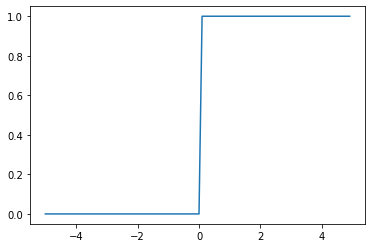

In [60]:
#x = np.arange(-5, 5, 0.1)
x = torch.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

### Sigmoid Function

In [61]:
def sigmoid(x):
  #return 1 / (1 + np.exp(-x))
  return 1 / (1 + torch.exp(-x))

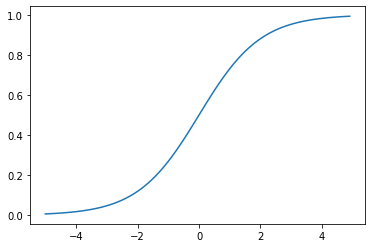

In [62]:
x = torch.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### ReLU Function

In [74]:
def relu(x):
  #return np.maximum(0, x)
  return torch.maximum(torch.tensor(0), x)

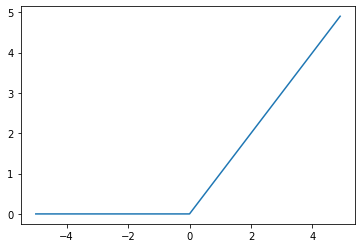

In [75]:
x = torch.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

In [120]:
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])
np.dot(A, B), torch.mm(A, B)

(array([[19, 22],
        [43, 50]]), tensor([[19, 22],
         [43, 50]]))

In [121]:
A = torch.Tensor([[1, 2], [3, 4]])
B = torch.Tensor([[5, 6], [7, 8]])
np.dot(A, B), torch.mm(A, B)

(array([[19., 22.],
        [43., 50.]], dtype=float32), tensor([[19., 22.],
         [43., 50.]]))

In [136]:
torch.tensor(0), torch.tensor(2), torch.tensor([2, 5]), type(torch.tensor(12))

(tensor(0), tensor(2), tensor([2, 5]), torch.Tensor)

In [135]:
torch.Tensor(0), torch.Tensor(5), torch.Tensor([2, 5]), torch.Tensor(2, 3), type(torch.tensor([12]))

(tensor([]),
 tensor([4.4721e-14, 3.0729e-41, 1.5975e-43, 1.3873e-43, 1.4574e-43]),
 tensor([2., 5.]),
 tensor([[4.4723e-14, 3.0729e-41, 3.9236e-44],
         [0.0000e+00,        nan,        nan]]),
 torch.Tensor)

In [129]:
A.ndim, A.shape, A.size(), A.shape[1], A.size()[1], A.size(1)

(2, torch.Size([2, 2]), torch.Size([2, 2]), 2, 2, 2)

In [132]:
0.1**2

0.010000000000000002

In [133]:
torch.tensor(0.1)**2

tensor(0.0100)

### 각 층의 신호 전달 구현

In [137]:
X = torch.Tensor([1.0, 0.5])
W1 = torch.Tensor([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = torch.Tensor([0.1, 0.2, 0.3])

In [142]:
A1 = X.matmul(W1) # X.mm(W1)은 오류
A1

tensor([0.2000, 0.5000, 0.8000])

In [144]:
Z1 = sigmoid(A1)
Z1

tensor([0.5498, 0.6225, 0.6900])

In [145]:
W2 = torch.Tensor([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = torch.Tensor([0.1, 0.2])

In [148]:
A2 = torch.matmul(Z1, W2) + B2
A2

tensor([0.4865, 1.1451])

In [149]:
Z2 = sigmoid(A2)
Z2

tensor([0.6193, 0.7586])

In [150]:
def identity_function(x):
  return x

In [151]:
W3 = torch.Tensor([[0.1, 0.3], [0.2, 0.4]])
B3 = torch.Tensor([0.1, 0.2])

In [152]:
A3 = torch.matmul(Z2, W3) + B3
A3

tensor([0.3137, 0.6892])

In [153]:
Y = identity_function(A3)

### Softmax Function

In [154]:
def softmax(a):
  exp_a = torch.exp(a)
  sum_exp_a = torch.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [155]:
a = torch.Tensor([1010, 1000, 990])
softmax(a)

tensor([nan, nan, nan])

In [156]:
def softmax(a):
  c = torch.max(a)
  exp_a = torch.exp(a-c)
  sum_exp_a = torch.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [157]:
softmax(a)

tensor([9.9995e-01, 4.5398e-05, 2.0611e-09])